In [2]:
import numpy as np
import math
import random
import pandas as pd 
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import io
ds= pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

Saving Iris.csv to Iris.csv


In [3]:
import csv

Exercise 1A

In [355]:
sepalL = []
sepalW = []
p_length = []
p_width = []
species = []
#making it into lists
for index, row in ds.iterrows():
    sepalL.append(row['SepalLengthCm'])
    sepalW.append(row['SepalWidthCm'])
    p_length.append(row['PetalLengthCm'])
    p_width.append(row['PetalWidthCm'])
    species.append(row['Species'])

# finding the euclidean distance
def euclid_distance(ds,centroids, n_clusters):
    distances = np.array([]).reshape(150,0)
    for i in range(n_clusters):
      #finds the distance
        dist = np.sum((ds-centroids[i])**2,axis=1)
        #appends dist to distances
        distances = np.c_[distances,dist]

    return distances


def update_centroids(p_length, p_width, min_indices, clusters, n_clusters):
    arr = [0]
    for i in range(n_clusters):
        arr.append(np.array([]).reshape(2,0))
    for i in range(150):
      #The function loops over each data point and appends its p_length and p_width to the appropriate array in arr based on its min_indices value.
        arr[min_indices[i]]=np.c_[arr[min_indices[i]],[p_length[i],p_width[i]]]
    for i in range(n_clusters):
        clusters[i]=np.mean(arr[i+1].T,axis=0)
    return clusters


def kmeans_cluster(p_length, p_width, plot_lines = True):
    cluster_data = np.concatenate(([p_length], [p_width])).T
    clusters = []
    for i in range(3):
        random_select = math.floor(random.uniform(0+i*50, (i+1)*50))
        clusters.append([p_length[random_select],p_width[random_select]])
        
        #continually updates assignments till convergence
    for i in range(100):
        distances = euclid_distance(cluster_data, clusters, 3)
        clusters = update_centroids(p_length, p_width, np.argmin(distances,axis=1)+1, clusters, 3)
      #creates the plot
    fig = plt.figure()
    cluster_data = fig.add_subplot(1, 1, 1)
    plt.title("K-means Clustered Iris Dataset")
    plt.xlabel("Petal Length in cm")
    plt.ylabel("Petal Width in cm")
   
    
    cluster_data.scatter(p_length[0:49], p_width[0:49], color='orange', label='Species-Setosa')
    cluster_data.scatter(p_length[50:100], p_width[50:100], color='blue', label='Species-Versicolor')
    cluster_data.scatter(p_length[101:150], p_width[101:150], color='magenta', label='Species-Virginica')
    for i in range(3):
        cluster_data.scatter(clusters[i][0], clusters[i][1], marker='o', s=100, color='black')
    if plot_lines:
        for i in range(2):
            mid = [(clusters[i][0] + clusters[i+1][0])/2, (clusters[i][1] + clusters[i+1][1])/2]
            slope = (clusters[i][0] - clusters[i+1][0])/(clusters[i+1][1] - clusters[i][1])
            plt.plot(np.linspace(1,8,10), slope*np.linspace(1,8,10) + mid[1] - slope*mid[0], 'k')
        plt.ylim(0, 3)
    plt.legend()
    plt.show()
  


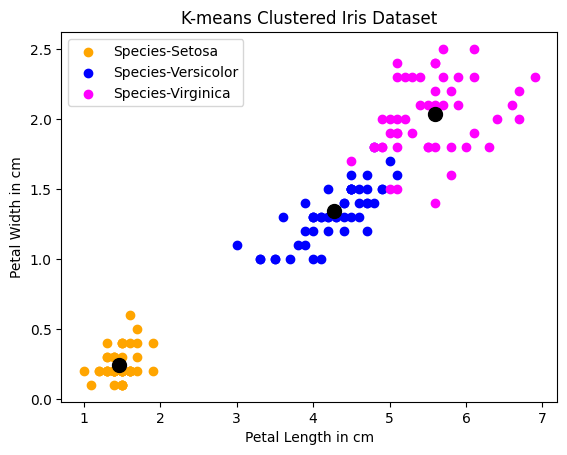

In [356]:
kmeans_cluster(p_length, p_width, False)

Exercise 1B

In [347]:
obj_values=[]
max_iterations = 25
def update_centroids_for1b(p_length, p_width, min_indices, clusters, n_clusters):
    arr = [0]
    sum_sq_distances = 0
    for i in range(n_clusters):
        arr.append(np.array([]).reshape(2,0))
    for i in range(150):
        cluster_idx = min_indices[i]
        arr[cluster_idx]=np.c_[arr[cluster_idx],[p_length[i],p_width[i]]]
        #finds sum of squared distances
        distance = np.sum((np.array([p_length[i], p_width[i]]) - clusters[cluster_idx-1])**2)
        sum_sq_distances += distance
    for i in range(n_clusters):
        clusters[i]=np.mean(arr[i+1].T,axis=0)
    return clusters, sum_sq_distances

#this is a function to calculate and plot the objective function values - modified version of the previous kmeans
def kmeans_cluster1_for1b(p_length, p_width, plot_lines = True):
    data = np.concatenate(([p_length], [p_width])).T
    clusters = []
    for i in range(3):
        choice = math.floor(random.uniform(0+i*50, (i+1)*50))
        clusters.append([p_length[choice],p_width[choice]])
        
    obj_func_values = []
    for i in range(max_iterations):
        clusters, sum_sq_distances = update_centroids_for1b(p_length, p_width, np.argmin(getDist(data, clusters, 3),axis=1)+1, clusters, 3)
        obj_func_values.append(sum_sq_distances)
    obj_values= obj_func_values
    
  
    if plot_lines:
        for i in range(2):
            mid = [(clusters[i][0] + clusters[i+1][0])/2, (clusters[i][1] + clusters[i+1][1])/2]
            slope = (clusters[i][0] - clusters[i+1][0])/(clusters[i+1][1] - clusters[i][1])
            plt.plot(np.linspace(1,8,10), slope*np.linspace(1,8,10) + mid[1] - slope*mid[0], 'k')
        plt.ylim(0, 3)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(obj_func_values)
    ax.set_xlabel('Iteration')
    ax.set_ylabel("Objective function Value")
    ax.set_title("Minimizing Objective Function")

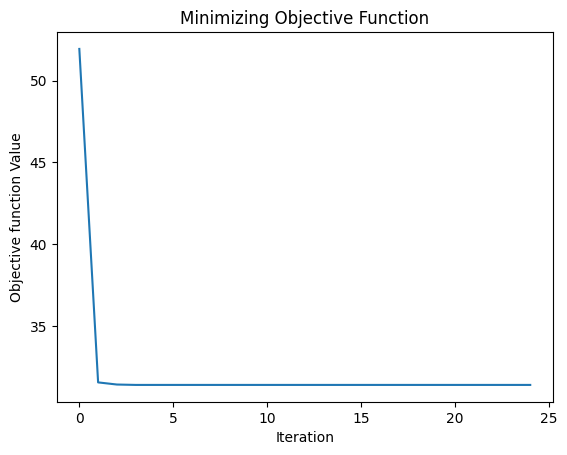

In [348]:
kmeans_cluster1_for1b(p_length,p_width,False)


Exercise 1C

In [349]:
def show_clusters(p_length, p_width, n_clusters):
    fig = plt.figure()
    iris_data = np.concatenate(([p_length], [p_width])).T
    iris_plot = fig.add_subplot(1, 1, 1)
    iris_plot.scatter(p_length[0:49], p_width[0:49], color='pink', label='Setosa')
    iris_plot.scatter(p_length[50:100], p_width[50:100], color='green', label='Versicolor')
    iris_plot.scatter(p_length[101:150], p_width[101:150], color='blue', label='Virginica')
    centroids = []
    #the color of centroids represents the stage of the learning process
    for i in range(n_clusters):
        centroids.append(iris_data[random.randint(0,149)])  
        iris_plot.scatter(centroids[i][0], centroids[i][1], s=250, alpha=0.75, c='purple', label='Initial')
    
    for i in range(5):
        allDist = euclid_distance(iris_data, centroids, n_clusters)
        centroids = update_centroids(p_length, p_width, np.argmin(allDist,axis=1)+1, centroids, n_clusters)
        if i == 2: 
            for j in range(n_clusters):
                iris_plot.scatter(centroids[j][0], centroids[j][1], s=250, alpha=0.75, c='red', label='Intermediate')
        elif i == 4:
            for j in range(n_clusters):
                iris_plot.scatter(centroids[j][0], centroids[j][1], s=250, alpha=0.75, c='yellow', label='Converged')
    
    plt.title("Results of Learning Process - Clusters over time")
    plt.legend()
    plt.ylabel("Petal Width in cm")
    plt.xlabel("Petal Length in cm")
    plt.ylim(0, 3.5)
    plt.xlim(0, 8)
    plt.show()

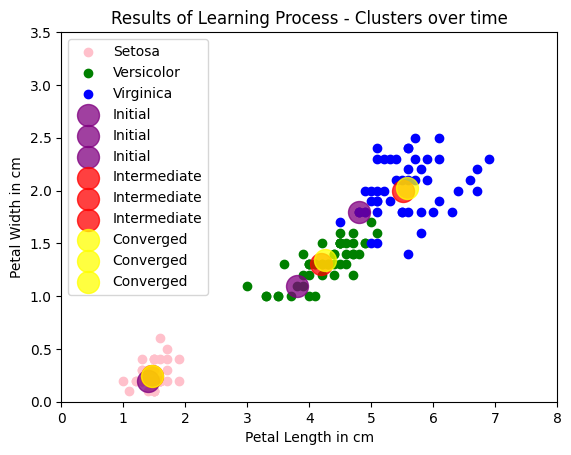

In [343]:
show_clusters(p_length, p_width, 3)

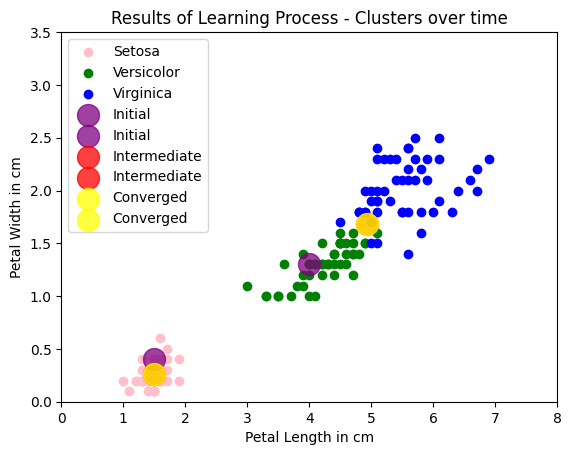

In [350]:
show_clusters(p_length, p_width, 2)

Exercise 1D

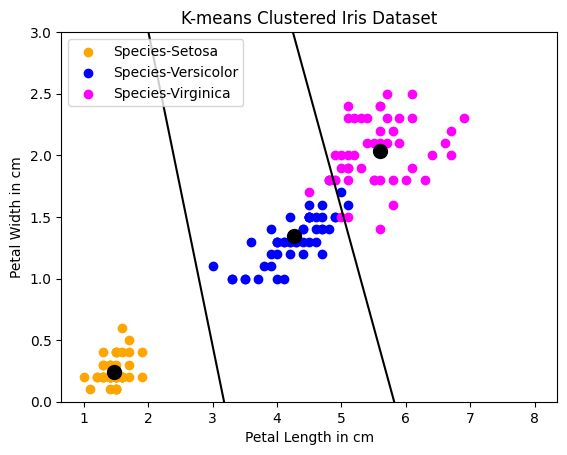

In [337]:
kmeans_cluster(p_length, p_width, True)

Exercise 2A and 2B

In [373]:
def meanSquareError(p_length, p_width, weights, species):
    sum = 0
    for i in range(len(p_length)):
      #from the textbook
        sigmoid = 1 / (1 + np.exp(-(weights[0]*p_length[i] + weights[1]*p_width[i]) + weights[2]))
        real = 1
        if species[i] == "versicolor":
            real = 0
        sum = sum + (real - sigmoid)**2
    return sum/len(p_length)

In [374]:
#weights selected by trial and error
# weights is the set of weights with small mean squared error
weights = np.array([.5, 2.0, 4.9]).T
# loss_weights is the set of weights with larger mean squared error
loss_weights = np.array([.1, 3.2, 8.2]).T
print(meanSquareError(p_length[50:150], p_width[50:150], weights, species[50:150]))
print(meanSquareError(p_length[50:150], p_width[50:150], loss_weights, species[50:150]))

0.16208270206988248
0.7446647589172095


In [369]:
def plot_boundaries(p_length, p_width, weights, loss_weights):
    x1 = np.linspace(2, 8, 100)
    x2 = []
    x3 = []
    for i in x1:
        x2.append(-(weights[0]/weights[1])*i+(weights[2]/weights[1]))
        x3.append(-(loss_weights[0]/loss_weights[1])*i+(loss_weights[2]/loss_weights[1]))
        
    fig = plt.figure()
    data = fig.add_subplot(1, 1, 1)
    data.scatter(p_length[50:100], p_width[50:100], color='green', label='Versicolor')
    data.scatter(p_length[101:150], p_width[101:150], color='red', label='Virginica')
    plt.plot(x1, x2, color='black')
    plt.plot(x1, x3, color='blue')
    plt.title("2B: Plot with Decision boundaries")
    plt.ylabel("Petal Width in cm")
    plt.xlabel("Petal Length in cm")
    plt.ylim(0)
    plt.legend()
    plt.show()

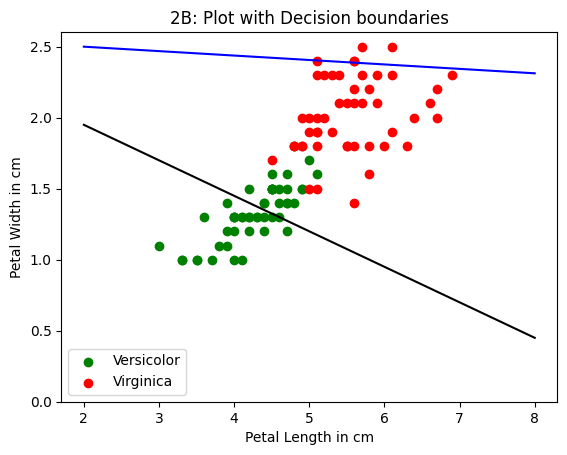

In [370]:
plot_boundaries(p_length,p_width,weights,loss_weights)

Exercise 2C and 2D can be found in the write up

Exercise 2E

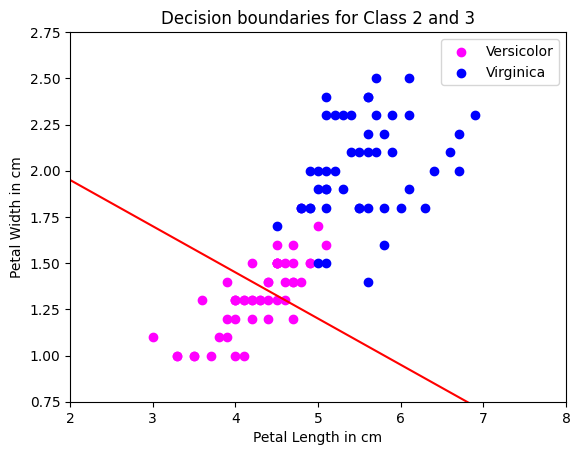

[-61.44872069 -19.31869296  14.13507458]
[1.11448721 2.19318693 4.75864925]


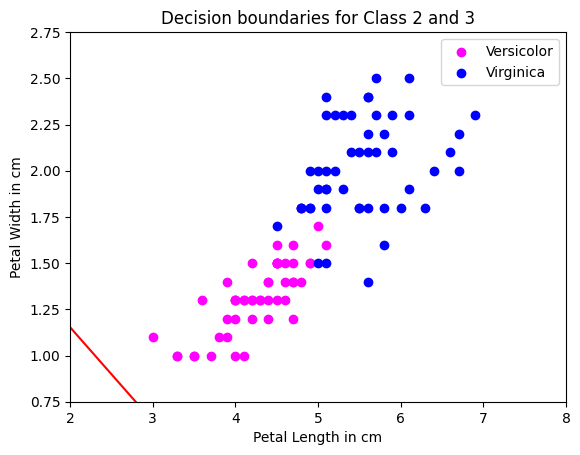

In [375]:
weights = np.array([.5, 2.0, 4.9]).T
# loss_weights is the set of weights with larger mean squared error
loss_weights = np.array([.1, 3.2, 8.2]).T

def gradient_desc(p_length, p_width, weights, species):
    gradient = np.zeros(3)
    for i in range(100):
        index = i + 50
        y = 1.0
        #For each flower in the training set, 
        #the function computes the predicted probability of it being a "versicolor" 
        # flower using the current weights and the logistic function
        if species[index] == "versicolor":
            y = 0.0
        sig_fxn = 1 / (1 + math.exp(-(weights[0]*p_length[index] + weights[1]*p_width[index]) + weights[2]))
        gradient[0] = gradient[0] + 2*(sig_fxn - y)*sig_fxn*(1 - sig_fxn)*p_length[index]
        gradient[1] = gradient[1] + 2*(sig_fxn - y)*sig_fxn*(1 - sig_fxn)*p_width[index]
        gradient[2] = gradient[2] - 2*(sig_fxn - y)*sig_fxn*(1 - sig_fxn)
    return gradient

def plot_desc(p_length, p_width, weights,line = True):
    fig = plt.figure()
    cluster_data = fig.add_subplot(1, 1, 1)
    plt.title("Decision boundaries for Class 2 and 3")
    plt.ylabel("Petal Width in cm")
    plt.xlabel("Petal Length in cm")
    plt.xlim(2, 8)
    plt.ylim(0.75, 2.75)
    cluster_data.scatter(p_length[50:100], p_width[50:100], color='magenta', label='Versicolor')
    cluster_data.scatter(p_length[101:150], p_width[101:150], color='blue', label='Virginica')
    if line:
        x1 = np.linspace(2, 8, 100)
        x2 = []
        for i in x1:
            x2.append(-(weights[0]/weights[1])*i+(weights[2]/weights[1]))
        plt.plot(x1, x2, color='red')
    plt.legend()
    plt.show()


#visualization
step=0.01 #the learning rate is 0.01
plot_desc(p_length, p_width, weights)
grad = gradient_desc(p_length, p_width, weights, species)
print(grad)
weights = weights - step*grad
print(weights)
plot_desc(p_length, p_width, weights)